In [1]:
%conda install matplotlib -y
%pip install ucimlrepo

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_std = scaler.transform(X)

## PCA

In [4]:
from sklearn.decomposition import PCA

pca = PCA() # Principal component analysis
pcs = pca.fit_transform(X_std)

display(pcs)

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

In [5]:
# Outputs how much each principal component describes the overall data
display(pca.explained_variance_ratio_)

# The first two principal components are sufficient to reflect the overall data, so use only the first two
pcdf = pd.DataFrame(data=pcs[:, 0:2], columns = ['principal component 1', 'principal component 2'])

display(pcdf)

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [6]:
display(y == 'Iris-setosa')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

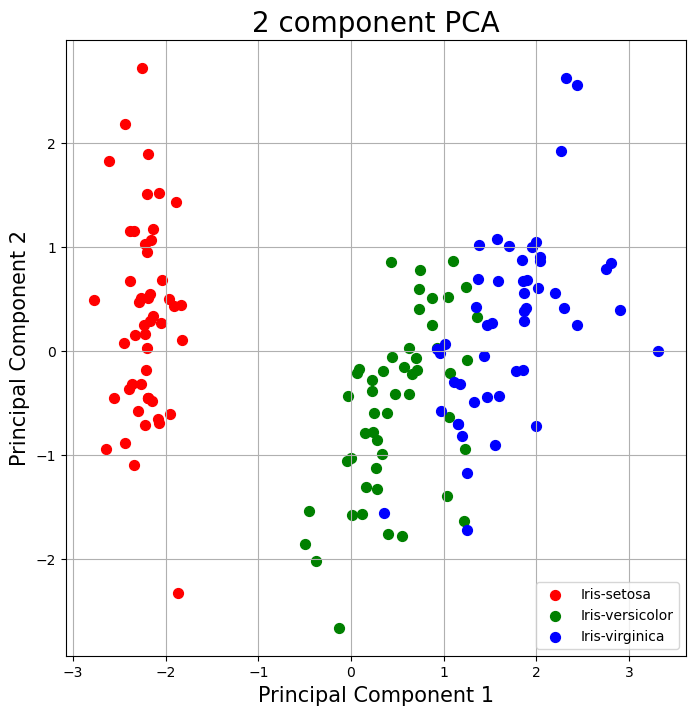

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(pcdf.loc[indicesToKeep, 'principal component 1']
               , pcdf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## t-SNE

In [8]:
from sklearn.manifold import TSNE

# Transfer 2 to 'n_components' factor to reduce data in two dimensions
tSNE = TSNE(n_components=2) 
ts = tSNE.fit_transform(X_std)

display(ts)

array([[-24.500826  ,   1.5860232 ],
       [-20.604177  ,   0.82811874],
       [-21.729752  ,   1.9038835 ],
       [-20.915442  ,   1.9603163 ],
       [-24.984858  ,   2.1921928 ],
       [-26.833042  ,   1.8862627 ],
       [-22.780207  ,   2.6693149 ],
       [-23.510988  ,   1.5993288 ],
       [-19.826069  ,   1.714875  ],
       [-21.411491  ,   0.88274705],
       [-26.00072   ,   1.2982922 ],
       [-23.130093  ,   2.1735828 ],
       [-20.523731  ,   1.2587868 ],
       [-20.180847  ,   2.3588212 ],
       [-27.421665  ,   1.3563888 ],
       [-27.988976  ,   1.9063994 ],
       [-26.84358   ,   1.7650102 ],
       [-24.494642  ,   1.6737256 ],
       [-26.736998  ,   1.1111233 ],
       [-26.154507  ,   2.2901843 ],
       [-24.405788  ,   0.5346793 ],
       [-25.592655  ,   2.240229  ],
       [-24.229195  ,   3.1639216 ],
       [-23.191248  ,   0.7220189 ],
       [-23.119339  ,   2.2306588 ],
       [-20.828901  ,   0.5028081 ],
       [-23.623756  ,   1.7117008 ],
 

In [11]:
# Conversion to data frame
tdf = pd.DataFrame(data=ts, columns = ['first feature', 'second feature'])

display(tdf)

,first feature,second feature
0,-25.699791,-0.439400
1,-21.746485,-0.807766
2,-22.975805,0.148431
3,-22.169785,0.283558
4,-26.242918,0.118761
...,...,...
145,14.008129,-0.172658
146,9.126028,1.618917
147,12.915380,-0.278057
148,14.947325,-2.172362


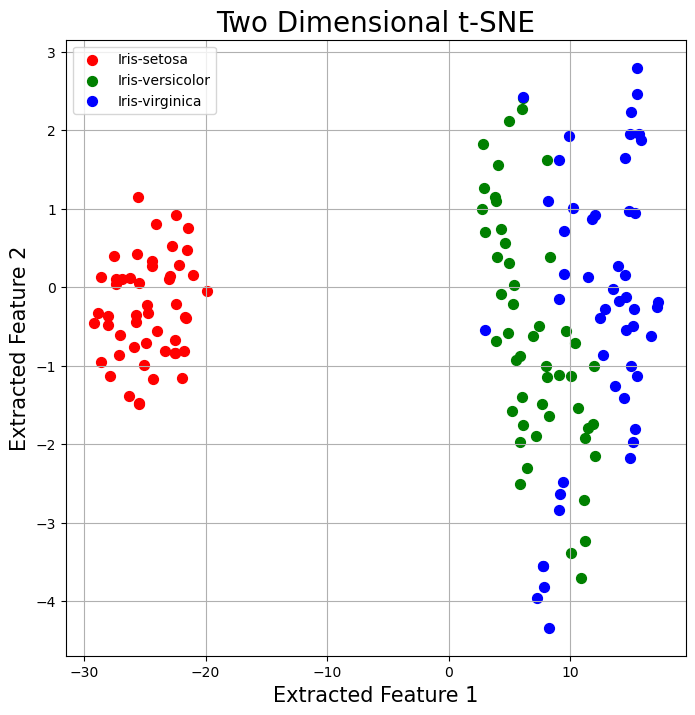

In [12]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Extracted Feature 1', fontsize = 15)
ax.set_ylabel('Extracted Feature 2', fontsize = 15)
ax.set_title('Two Dimensional t-SNE', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(tdf.loc[indicesToKeep, 'first feature']
               , tdf.loc[indicesToKeep, 'second feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Isomap

In [13]:
from sklearn.manifold import Isomap

# Transfer 2 to 'n_components' factor to reduce data in two dimensions
isomap = Isomap(n_components=2)
iss = isomap.fit_transform(X_std)

display(iss)

array([[ 5.36398612e+00, -1.57988095e-01],
       [ 3.97794556e+00, -8.90990392e-02],
       [ 4.34024997e+00, -9.33122497e-02],
       [ 4.05139754e+00, -7.73598182e-02],
       [ 5.62470235e+00, -1.69114636e-01],
       [ 6.72475229e+00, -2.12917990e-01],
       [ 4.76934647e+00, -1.06805924e-01],
       [ 5.09636442e+00, -1.45969422e-01],
       [ 3.51966812e+00, -4.95572711e-02],
       [ 4.25456759e+00, -1.04041022e-01],
       [ 6.17518385e+00, -1.88743922e-01],
       [ 5.07493355e+00, -1.25459773e-01],
       [ 4.05027297e+00, -8.06376501e-02],
       [ 3.80383079e+00, -1.10553448e-02],
       [ 7.18373625e+00, -2.27680653e-01],
       [ 7.93144695e+00, -2.61713355e-01],
       [ 6.71948091e+00, -2.13072725e-01],
       [ 5.39411566e+00, -1.55687158e-01],
       [ 6.61062017e+00, -2.00541220e-01],
       [ 6.26227026e+00, -1.94219870e-01],
       [ 5.45401947e+00, -1.26224260e-01],
       [ 5.99756590e+00, -1.83685858e-01],
       [ 5.29577299e+00, -1.25587482e-01],
       [ 5.

In [14]:
# Conversion to data frame
isdf = pd.DataFrame(data=iss, columns = ['first feature', 'second feature'])

display(isdf)

,first feature,second feature
0,5.363986,-0.157988
1,3.977946,-0.089099
2,4.340250,-0.093312
3,4.051398,-0.077360
4,5.624702,-0.169115
...,...,...
145,-3.930052,-0.162530
146,-2.477224,0.943962
147,-3.484774,-0.119025
148,-4.587027,-0.361874


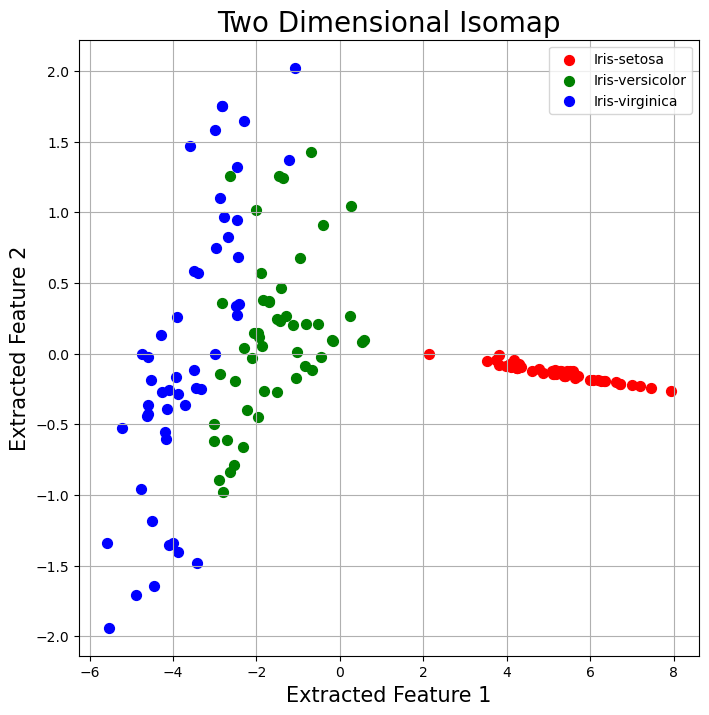

In [15]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Extracted Feature 1', fontsize = 15)
ax.set_ylabel('Extracted Feature 2', fontsize = 15)
ax.set_title('Two Dimensional Isomap', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(isdf.loc[indicesToKeep, 'first feature']
               , isdf.loc[indicesToKeep, 'second feature']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## Practice

### Dimension Reduction practice
The following is data on cancer patients.
Describe how much PCA can be used to lower the dimension.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

import numpy as np
import pandas as pd

raw = datasets.load_breast_cancer()

example = pd.DataFrame(data=raw.data, columns=raw.feature_names)
example["label"] = raw.target

example.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


First, process data.

In [17]:
# Preprocessing 
X = example.iloc[:, :-1].values
y = example.iloc[:, -1].values

# Feature Scaling 
scaler = StandardScaler()
scaler.fit(X)

X_std = scaler.transform(X)

Perform PCA.

In [18]:
pca = PCA() # Principal component analysis
pcs = pca.fit_transform(X_std)

display(pcs)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [19]:
# Outputs how much each principal component describes the overall data
display(pca.explained_variance_ratio_)

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [13]:
for i in range(3, 10):
    print(f"Degree of explanation when lowered to {i} dimension: {sum(pca.explained_variance_ratio_[:i])}")

Degree of explanation when lowered to 3 dimension: 0.9948480731910937
Degree of explanation when lowered to 4 dimension: 1.0
Degree of explanation when lowered to 5 dimension: 1.0
Degree of explanation when lowered to 6 dimension: 1.0
Degree of explanation when lowered to 7 dimension: 1.0
Degree of explanation when lowered to 8 dimension: 1.0
Degree of explanation when lowered to 9 dimension: 1.0


Considering both the number of dimensions and the degree of explanation, 5-6 dimensions seem appropriate.